In [3]:
!pip install pycaret[full]
!pip install mlxtend

In [5]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [6]:
groceries_data = pd.read_csv('/content/groceries - groceries.csv')
groceries_data.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
transactions = groceries_data.apply(lambda row: row.dropna().tolist()[1:], axis=1).tolist()

In [9]:
from collections import Counter
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transactions_df = pd.DataFrame(te_ary, columns=te.columns_)

In [10]:
frequent_itemsets = apriori(transactions_df, min_support=0.01, use_colnames=True)

print(frequent_itemsets)

      support                                       itemsets
0    0.033452                                     (UHT-milk)
1    0.017692                                (baking powder)
2    0.052466                                         (beef)
3    0.033249                                      (berries)
4    0.026029                                    (beverages)
..        ...                                            ...
328  0.011998  (root vegetables, tropical fruit, whole milk)
329  0.014540          (root vegetables, whole milk, yogurt)
330  0.010473                     (soda, whole milk, yogurt)
331  0.015150           (tropical fruit, whole milk, yogurt)
332  0.010880       (whipped/sour cream, whole milk, yogurt)

[333 rows x 2 columns]


In [11]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print(rules)

                      antecedents                       consequents  \
0              (other vegetables)                            (beef)   
1                          (beef)                (other vegetables)   
2                    (rolls/buns)                            (beef)   
3                          (beef)                      (rolls/buns)   
4               (root vegetables)                            (beef)   
..                            ...                               ...   
593  (whipped/sour cream, yogurt)                      (whole milk)   
594          (whole milk, yogurt)              (whipped/sour cream)   
595          (whipped/sour cream)              (whole milk, yogurt)   
596                  (whole milk)      (whipped/sour cream, yogurt)   
597                      (yogurt)  (whipped/sour cream, whole milk)   

     antecedent support  consequent support   support  confidence      lift  \
0              0.193493            0.052466  0.019725    0.101944  1

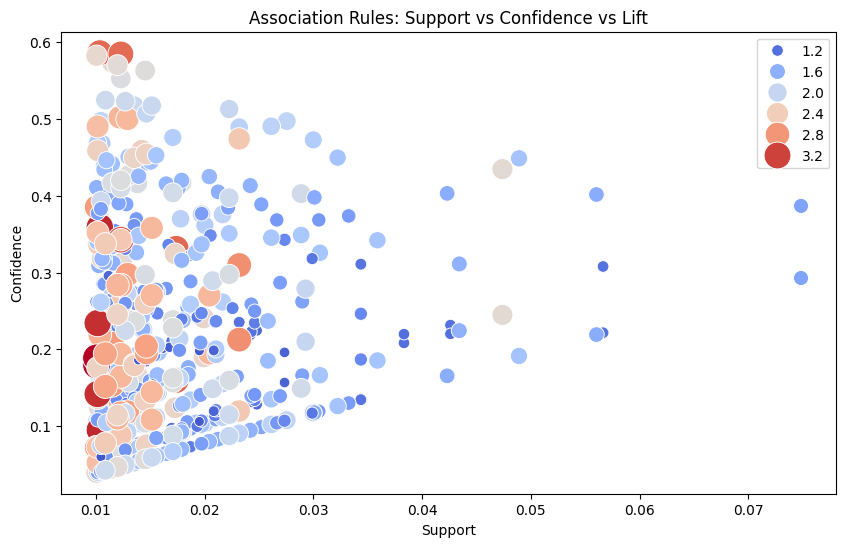

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', palette='coolwarm', sizes=(40, 400))

plt.title('Association Rules: Support vs Confidence vs Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')

plt.legend(loc='best')
plt.show()